# 1.0 Exploratory Data Analysis (EDA)

[![Static Badge](https://img.shields.io/badge/Back_to_README.md-red?style=for-the-badge&logo=github&labelColor=black)](https://github.com/izzad2413/sustainable_ota)

In [3]:
# import the necessary library
import os
import pandas as pd
import numpy as np
import missingno as msno
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

Matplotlib is building the font cache; this may take a moment.


In [4]:
data_dir = './../data/interim/combined_data.csv' # dataset directory
df = pd.read_csv(data_dir) # read the dataset

### 1.1 A Quick Overview of the Dataset

<Axes: >

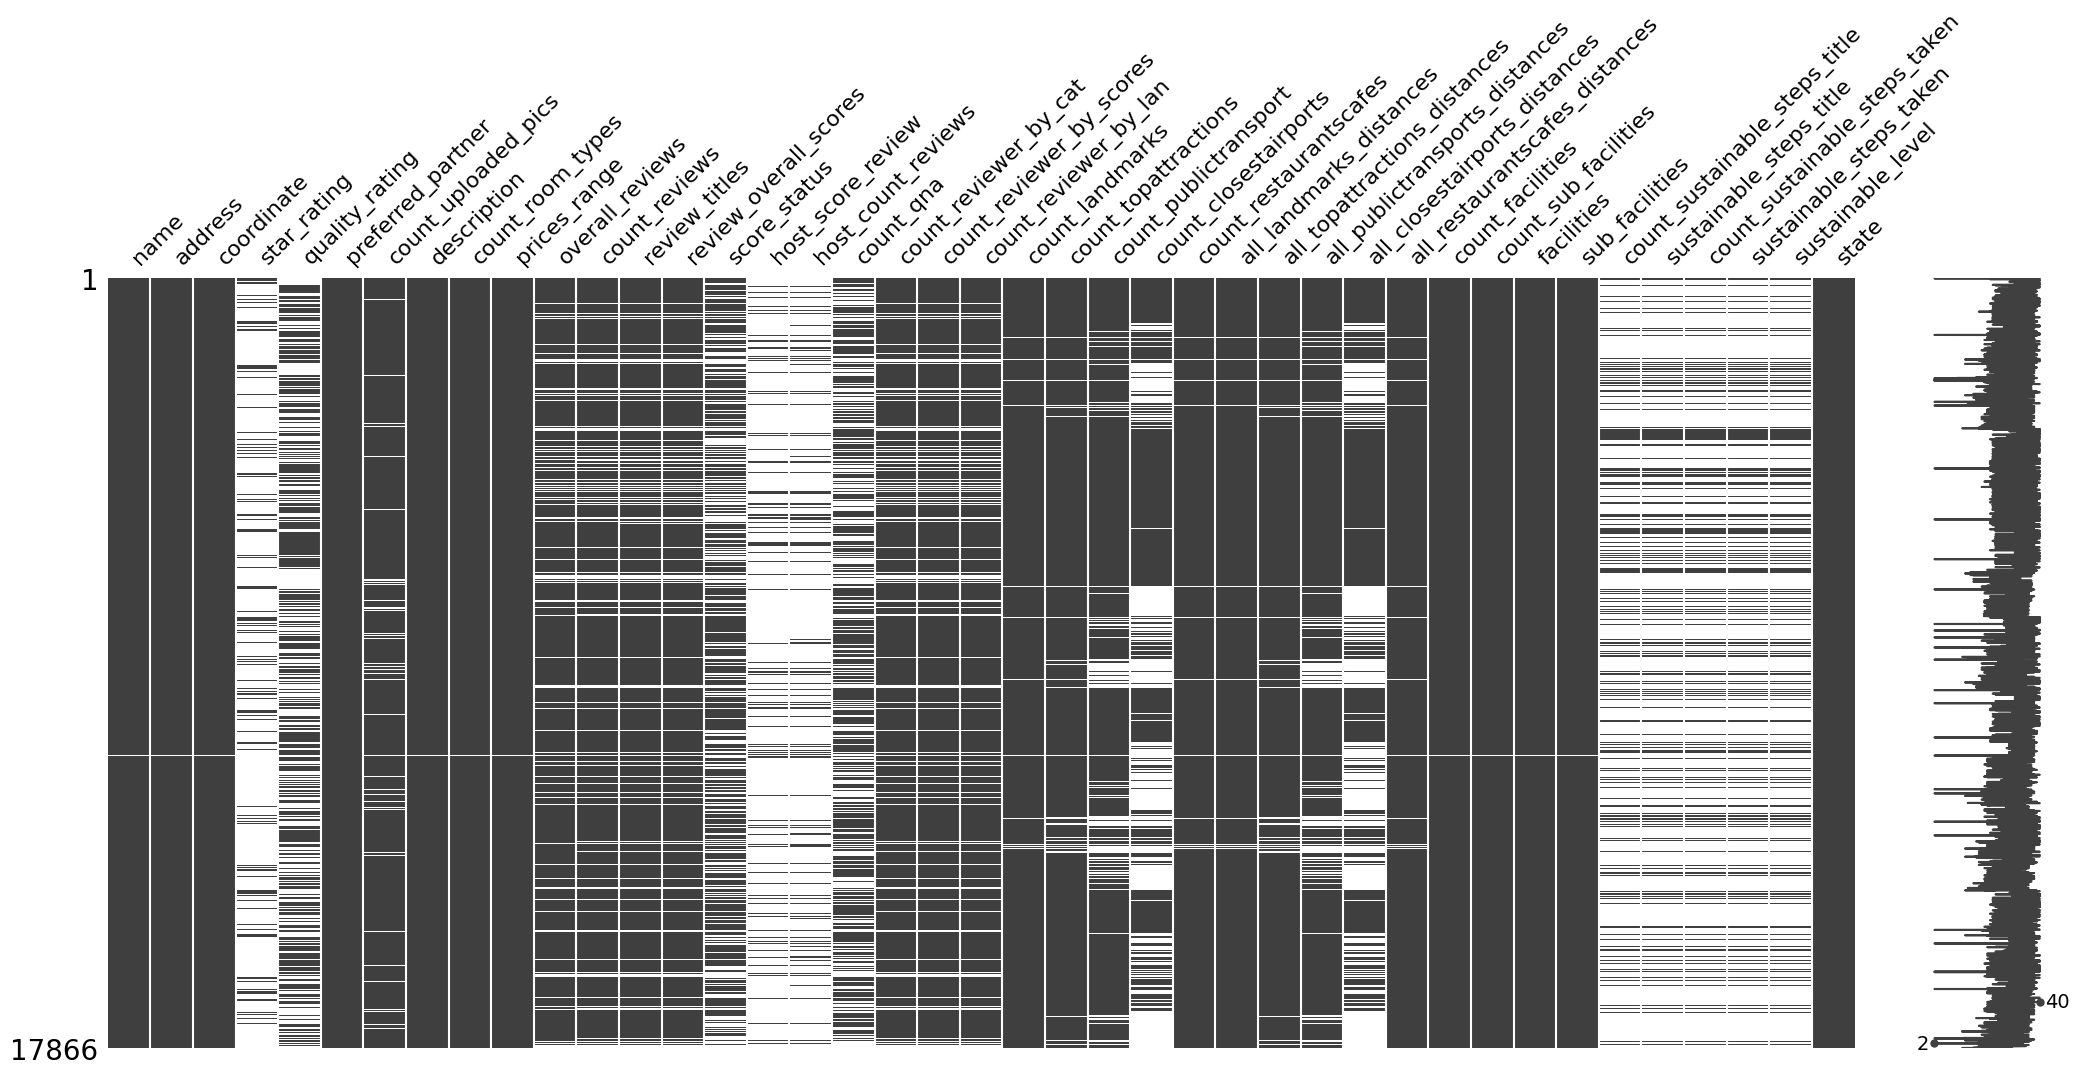

In [5]:
msno.matrix(df)

### 1.2 Data Distribution

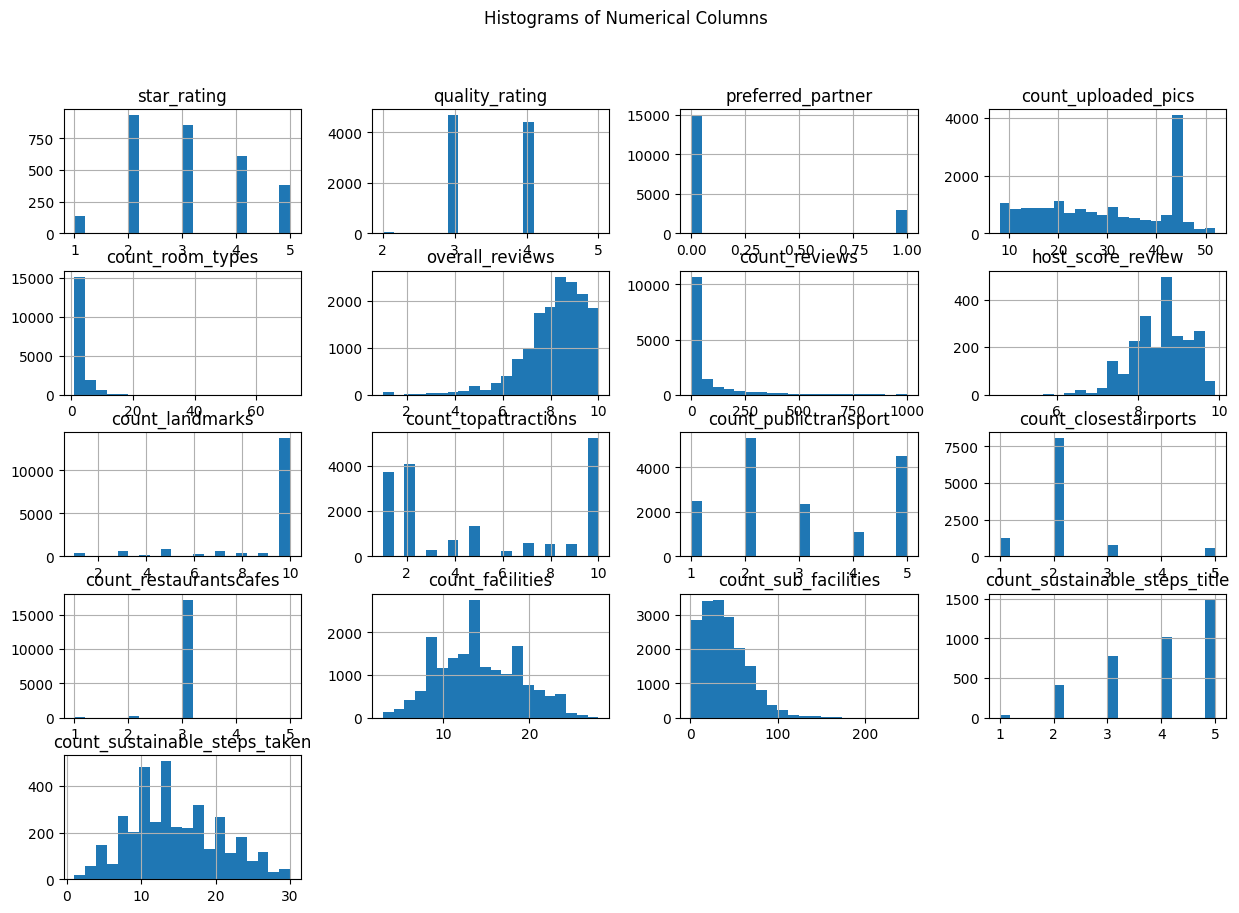

In [6]:
# Getting the  numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Plot histograms for numerical columns
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [7]:
# To get a quick view between class sustainable & non-sustainable
df['sustainable_level'] = df['sustainable_level'].fillna(0) # convert null to 0

In [8]:
# Create a function to distinguish between class
def create_sustainable_label(level):
    if level == 0:
        return 'non-travel sustainable'
    else:
        return 'travel sustainable'

# Apply the function to the dataset    
df['sustainable_label'] = df['sustainable_level'].apply(lambda x: create_sustainable_label(x))

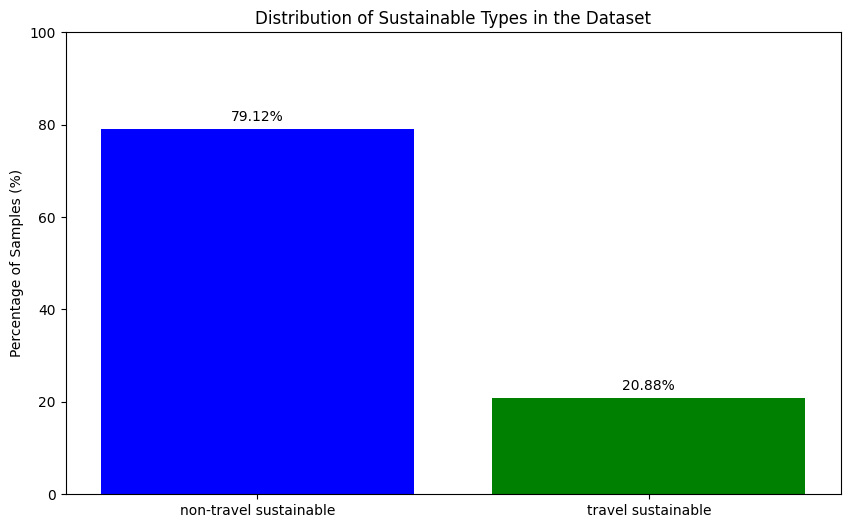

In [25]:
# Count
total_count_label = len(df.sustainable_label)
count_ts = len(df[df['sustainable_label'] == 'travel sustainable'])
count_nts = len(df[df['sustainable_label'] == 'non-travel sustainable'])

# Calculate the percentages
ts_percentage = (count_ts / total_count_label) * 100
nts_percentage = (count_nts / total_count_label) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_labels = ['non-travel sustainable', 'travel sustainable']
bar_values = [nts_percentage, ts_percentage]
bars = plt.bar(bar_labels, bar_values, color=['blue', 'green'])

# Add data labels to the bars
for bar, value in zip(bars, bar_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', va='bottom')

# Set plot properties
plt.ylabel('Percentage of Samples (%)')
plt.title('Distribution of Sustainable Types in the Dataset')
plt.ylim(0, 100)

# Display the plot
plt.show()

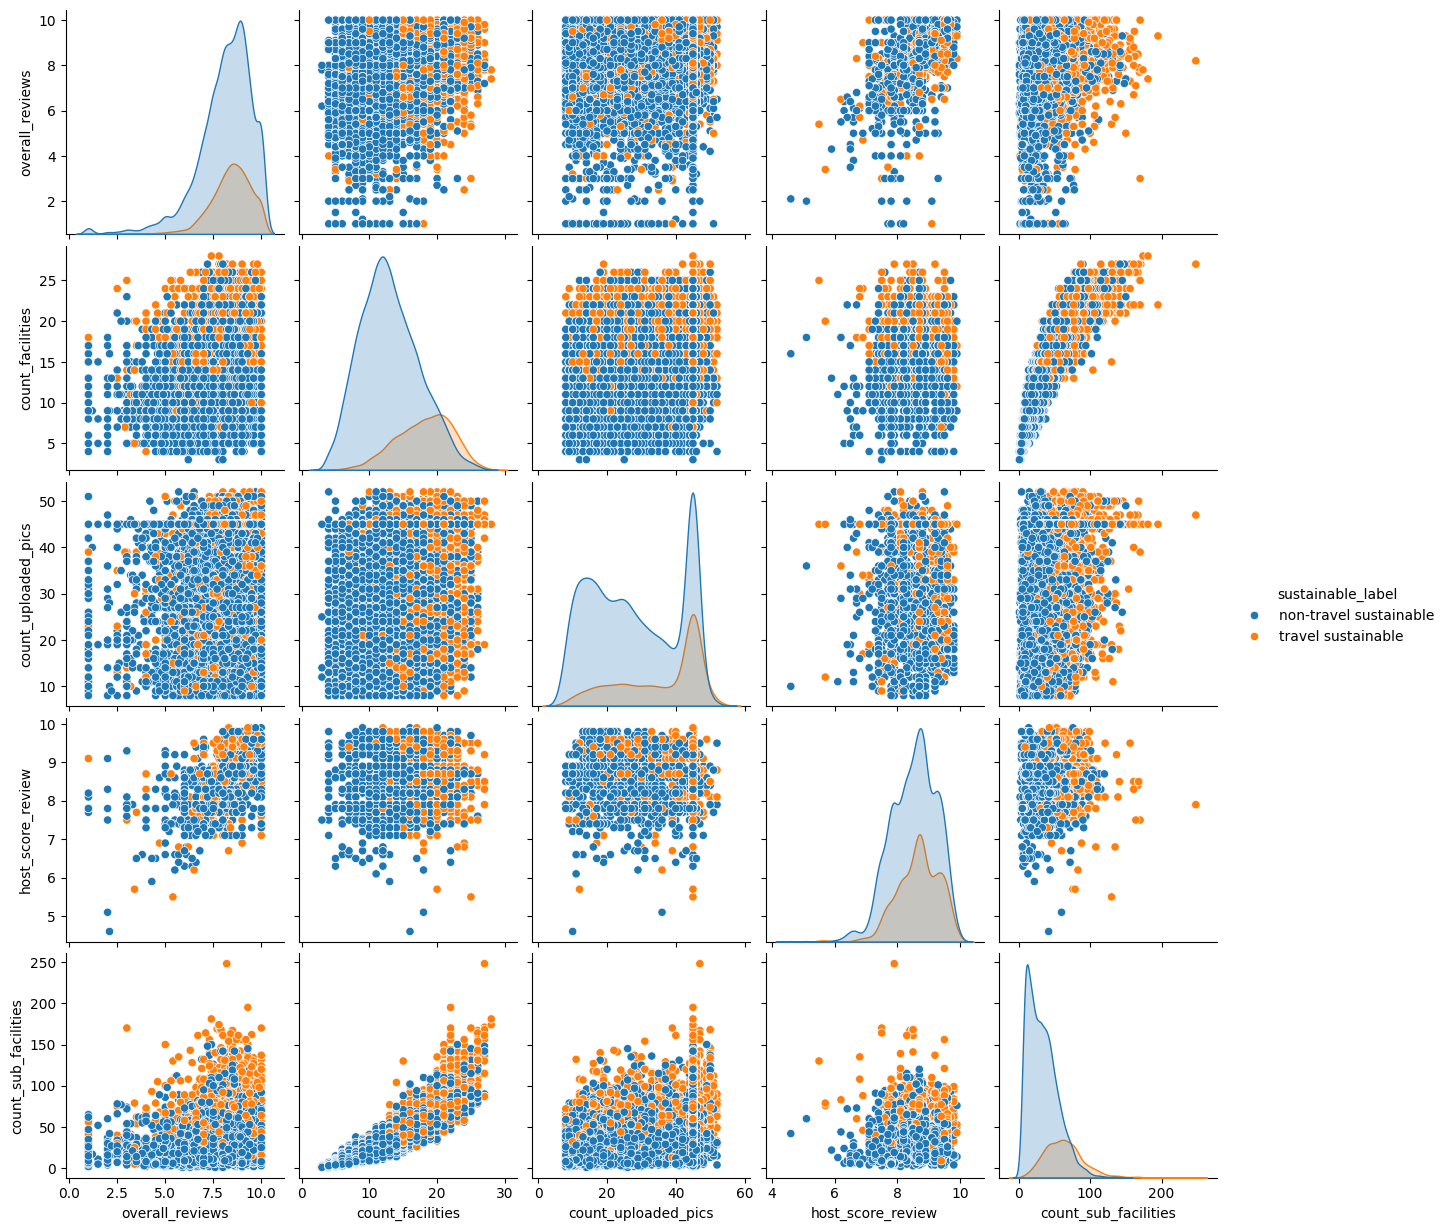

In [15]:
# In depth exploration
columns_of_interest = ['overall_reviews', 'count_facilities', 'count_uploaded_pics','host_score_review','count_sub_facilities']

# Create a pairplot for the specified columns
sns.pairplot(df, vars=columns_of_interest, hue='sustainable_label')

# Show the plot
plt.show()

### 1.3 Data Type Information

In [16]:
# Filter and get column names with the 'object' data type
object_columns = df.select_dtypes(include=['object'])
float_columns = df.select_dtypes(include=['float'])
int_columns = df.select_dtypes(include=['int'])

# Get the column names as a list
object_column_names = object_columns.columns.tolist()
float_column_names = float_columns.columns.tolist()
int_column_names = int_columns.columns.tolist()

# Print the column names with the 'object' data type
print(f'Total object: {len(object_column_names)}/{len(df.columns)} ({(len(object_column_names)/len(df.columns) * 100):.2f}%)')
print('object cols:',object_column_names,'\n')
print(f'Total float: {len(float_column_names)}/{len(df.columns)} ({(len(float_column_names)/len(df.columns) * 100):.2f}%)')
print('float cols:',float_column_names,'\n')
print(f'Total integer: {len(int_column_names)}/{len(df.columns)} ({(len(int_column_names)/len(df.columns) * 100):.2f}%)')
print('int cols:',int_column_names)

Total object: 25/42 (59.52%)
object cols: ['name', 'address', 'coordinate', 'description', 'prices_range', 'review_titles', 'review_overall_scores', 'score_status', 'host_count_reviews', 'count_qna', 'count_reviewer_by_cat', 'count_reviewer_by_scores', 'count_reviewer_by_lan', 'all_landmarks_distances', 'all_topattractions_distances', 'all_publictransports_distances', 'all_closestairports_distances', 'all_restaurantscafes_distances', 'facilities', 'sub_facilities', 'sustainable_steps_title', 'sustainable_steps_taken', 'sustainable_level', 'state', 'sustainable_label'] 

Total float: 16/42 (38.10%)
float cols: ['star_rating', 'quality_rating', 'count_uploaded_pics', 'count_room_types', 'overall_reviews', 'count_reviews', 'host_score_review', 'count_landmarks', 'count_topattractions', 'count_publictransport', 'count_closestairports', 'count_restaurantscafes', 'count_facilities', 'count_sub_facilities', 'count_sustainable_steps_title', 'count_sustainable_steps_taken'] 

Total integer: 1/4

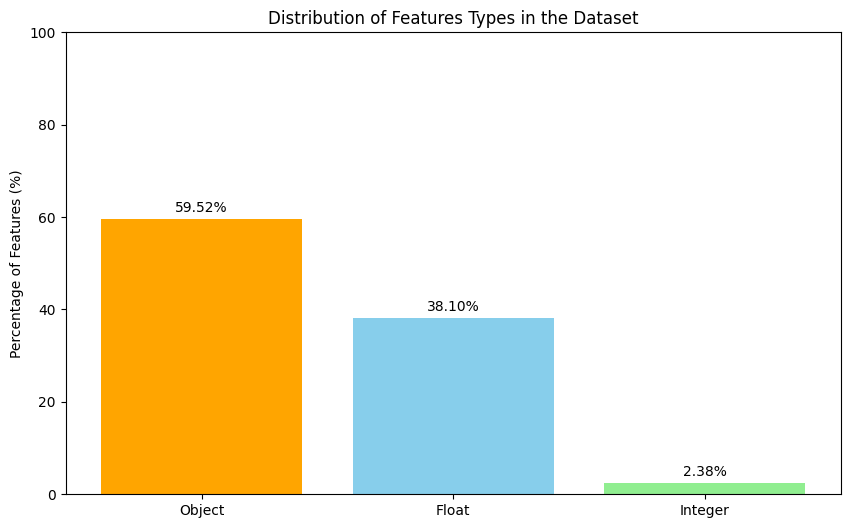

In [17]:
# Count the number of columns for each data type
object_count = len(object_column_names)
float_count = len(float_column_names)
int_count = len(int_column_names)

# Calculate the percentages
total_columns = len(df.columns)
object_percentage = (object_count / total_columns) * 100
float_percentage = (float_count / total_columns) * 100
int_percentage = (int_count / total_columns) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_labels = ['Object', 'Float', 'Integer']
bar_values = [object_percentage, float_percentage, int_percentage]
bars = plt.bar(bar_labels, bar_values, color=['orange', 'skyblue', 'lightgreen'])

# Add data labels to the bars
for bar, value in zip(bars, bar_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.2f}%', ha='center', va='bottom')

# Set plot properties
plt.ylabel('Percentage of Features (%)')
plt.title('Distribution of Features Types in the Dataset')
plt.ylim(0, 100)

# Display the plot
plt.show()

### 1.4 Inspecting Null Vales

In [18]:
# 1. How many samples have complete data of all features?
complete_samples = df.dropna()
complete_samples_percentage = (len(complete_samples) / len(df)) * 100
print(f"1. Percentage of samples with complete data: {complete_samples_percentage:.2f}%")

# 2. How many samples have at least one missing value?
samples_with_missing_values = df[df.isnull().any(axis=1)]
samples_with_missing_values_percentage = (len(samples_with_missing_values) / len(df)) * 100
print(f"2. Percentage of samples with at least one missing value: {samples_with_missing_values_percentage:.2f}%")

# 3. How many samples have 1 to 3 missing values?
samples_1_to_3_missing = df[df.isnull().sum(axis=1).between(1, 3)]
samples_1_to_3_missing_percentage = (len(samples_1_to_3_missing) / len(df)) * 100
print(f"3. Percentage of samples with 1 to 3 missing values: {samples_1_to_3_missing_percentage:.2f}%")

# 4. How many samples have 4 to 6 missing values?
samples_4_to_6_missing = df[df.isnull().sum(axis=1).between(4, 6)]
samples_4_to_6_missing_percentage = (len(samples_4_to_6_missing) / len(df)) * 100
print(f"4. Percentage of samples with 4 to 6 missing values: {samples_4_to_6_missing_percentage:.2f}%")

# 5. How many samples have 7 to 9 missing values?
samples_7_to_9_missing = df[df.isnull().sum(axis=1).between(7, 9)]
samples_7_to_9_missing_percentage = (len(samples_7_to_9_missing) / len(df)) * 100
print(f"5. Percentage of samples with 7 to 9 missing values: {samples_7_to_9_missing_percentage:.2f}%")

# 6. How many samples have 10 to 12 missing values?
samples_10_to_12_missing = df[df.isnull().sum(axis=1).between(10, 12)]
samples_10_to_12_missing_percentage = (len(samples_10_to_12_missing) / len(df)) * 100
print(f"6. Percentage of samples with 10 to 12 missing values: {samples_10_to_12_missing_percentage:.2f}%")

# 6. How many samples have 13 to 15 missing values?
samples_13_to_15_missing = df[df.isnull().sum(axis=1).between(13, 15)]
samples_13_to_15_missing_percentage = (len(samples_13_to_15_missing) / len(df)) * 100
print(f"7. Percentage of samples with 13 to 15 missing values: {samples_13_to_15_missing_percentage:.2f}%")

# 6. How many samples have 16 to 18 missing values?
samples_16_to_18_missing = df[df.isnull().sum(axis=1).between(16, 18)]
samples_16_to_18_missing_percentage = (len(samples_16_to_18_missing) / len(df)) * 100
print(f"8. Percentage of samples with 16 to 18 missing values: {samples_16_to_18_missing_percentage:.2f}%")

# 6. How many samples have more than 20 missing values?
samples_more_than_20_missing = df[df.isnull().sum(axis=1) > 20]
samples_more_than_20_missing_percentage = (len(samples_more_than_20_missing) / len(df)) * 100
print(f"9. Percentage of samples with more than 20 missing values: {samples_more_than_20_missing_percentage:.2f}%")

1. Percentage of samples with complete data: 0.00%
2. Percentage of samples with at least one missing value: 100.00%
3. Percentage of samples with 1 to 3 missing values: 8.28%
4. Percentage of samples with 4 to 6 missing values: 13.90%
5. Percentage of samples with 7 to 9 missing values: 40.48%
6. Percentage of samples with 10 to 12 missing values: 20.58%
7. Percentage of samples with 13 to 15 missing values: 5.39%
8. Percentage of samples with 16 to 18 missing values: 7.40%
9. Percentage of samples with more than 20 missing values: 1.09%


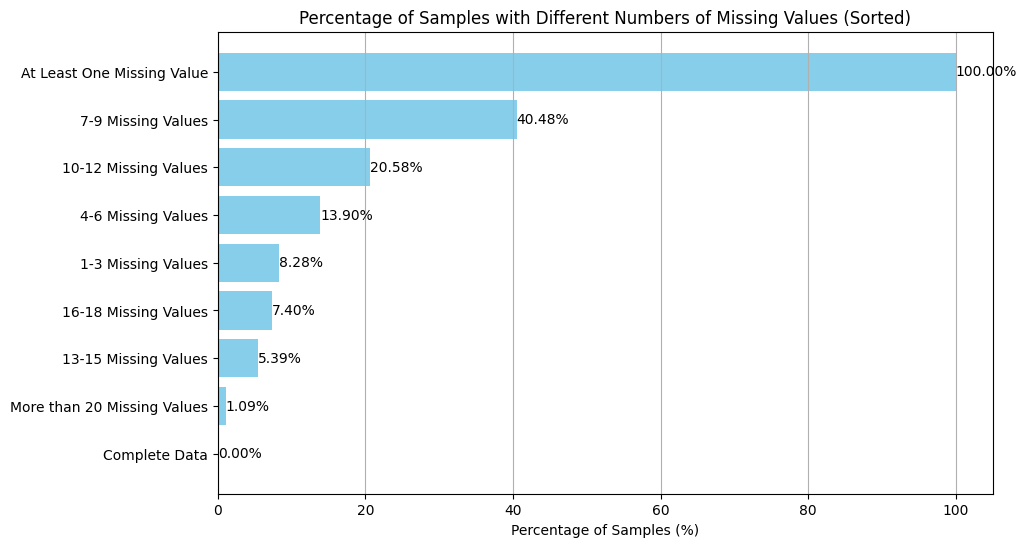

In [19]:
# Define the categories and their corresponding percentages
categories = ["Complete Data", "At Least One Missing Value", "1-3 Missing Values", "4-6 Missing Values", "7-9 Missing Values", "10-12 Missing Values", "13-15 Missing Values", "16-18 Missing Values", "More than 20 Missing Values"]
percentages = [complete_samples_percentage, samples_with_missing_values_percentage, samples_1_to_3_missing_percentage, samples_4_to_6_missing_percentage, samples_7_to_9_missing_percentage, samples_10_to_12_missing_percentage, samples_13_to_15_missing_percentage, samples_16_to_18_missing_percentage, samples_more_than_20_missing_percentage]

# Sort the categories and percentages in descending order
sorted_indices = sorted(range(len(percentages)), key=lambda k: percentages[k], reverse=False)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_percentages = [percentages[i] for i in sorted_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_categories, sorted_percentages, color='skyblue')
plt.xlabel('Percentage of Samples (%)')
plt.title('Percentage of Samples with Different Numbers of Missing Values (Sorted)')
plt.grid(axis='x')

# Add data labels to the bars
for bar, percentage in zip(bars, sorted_percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', va='center')

# Display the plot
plt.show()

In [20]:
# Calculate the percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the features by the percentage of missing values in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the top ten features with the highest missing values
top_ten_missing_features = sorted_missing_percentage.head(10)
print("Top 10 features with the highest missing values:")
print(top_ten_missing_features)

Top 10 features with the highest missing values:
host_score_review                86.818538
host_count_reviews               84.764357
star_rating                      83.678495
count_sustainable_steps_title    79.116758
sustainable_steps_taken          79.116758
count_sustainable_steps_taken    79.116758
sustainable_steps_title          79.116758
quality_rating                   48.578305
count_closestairports            40.070525
all_closestairports_distances    40.070525
dtype: float64


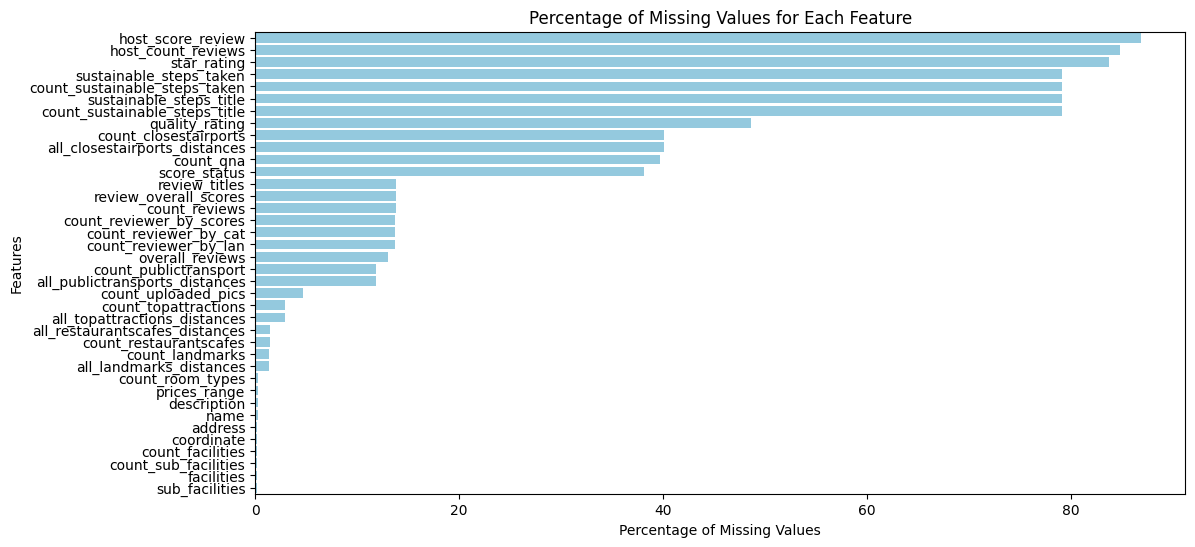

In [21]:
# Calculate the percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter features with missing values
missing_features = missing_percentage[missing_percentage > 0]

# Sort the features by the percentage of missing values in descending order
sorted_missing_features = missing_features.sort_values(ascending=False)

# Plot a horizontal bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_missing_features.values, y=sorted_missing_features.index, color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Percentage of Missing Values for Each Feature')
plt.show()

### 1.5 Conclusion

- The data exploration reveals an imbalanced class distribution for the sustainable label, with a ratio of 79.12% non-travel sustainable to 20.88% travel sustainable. 
- Given the data distribution, exploring non-linear algorithms could be beneficial.
- The dataset is complex, with over 50% of the columns being text data type. It requires extensive feature engineering and data imputation, as 8 features have more than 50% missing values, and 63% of the samples have missing values in 4 to 12 different features. 
- To maximize the dataset's potential, dropping features is not an option; further preprocessing is essential for reevaluation.